# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing some library

In [1]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
df=pd.read_csv("census_income1.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape   ## to check how many rows and columns in a data set

(32560, 15)

Observation : In this data, there are 32560 rows and 15 columns.

In [4]:
df.dtypes    ## it will show the datatypes of the columns

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
# In this data set there are some categorical featurs and some are numerical features.

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
## These all are columns of this dataset.

In [8]:
df.info()   ## it will give the information about dataset like is there any null values or not in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Checking null values

In [9]:
df.isnull()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

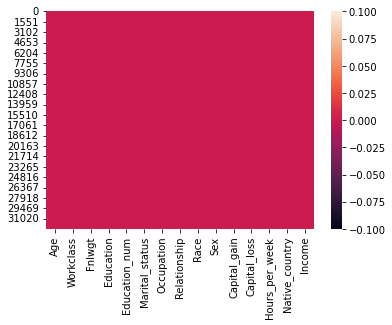

In [11]:
sns.heatmap(df.isnull())

In [12]:
# Checking the counts of label categories
Income = df['Income'].value_counts(normalize=True)
round(Income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object

# EDA

# Univariate Analysis

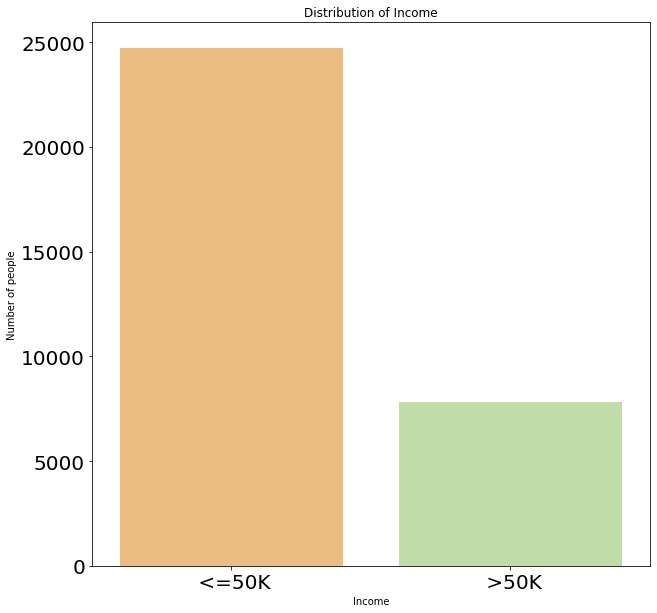

In [13]:
# Creating a barplot for 'Income'
Income = df['Income'].value_counts()
plt.figure(figsize=(10, 10))
sns.barplot(Income.index, Income.values, palette='Spectral')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.tick_params(labelsize=20)
plt.show()

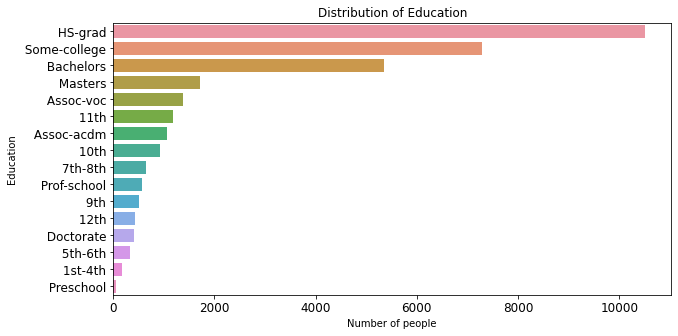

In [14]:
# Creating a barplot for 'Education'
Education = df['Education'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(Education.values, Education.index)
plt.title('Distribution of Education')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.tick_params(labelsize=12)
plt.show()

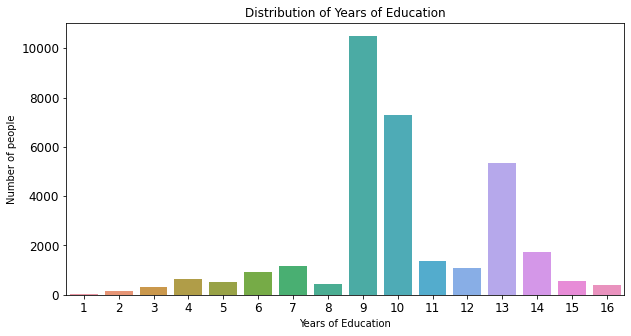

In [15]:
# Creating a barplot for 'Years of Education'
edu_num = df['Education_num'].value_counts()


plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values)
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

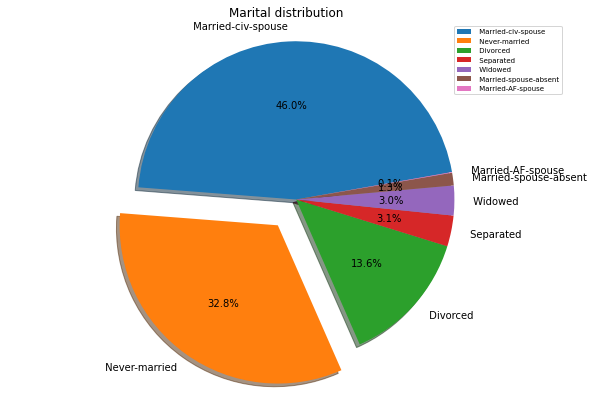

In [16]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()


plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')

plt.show()

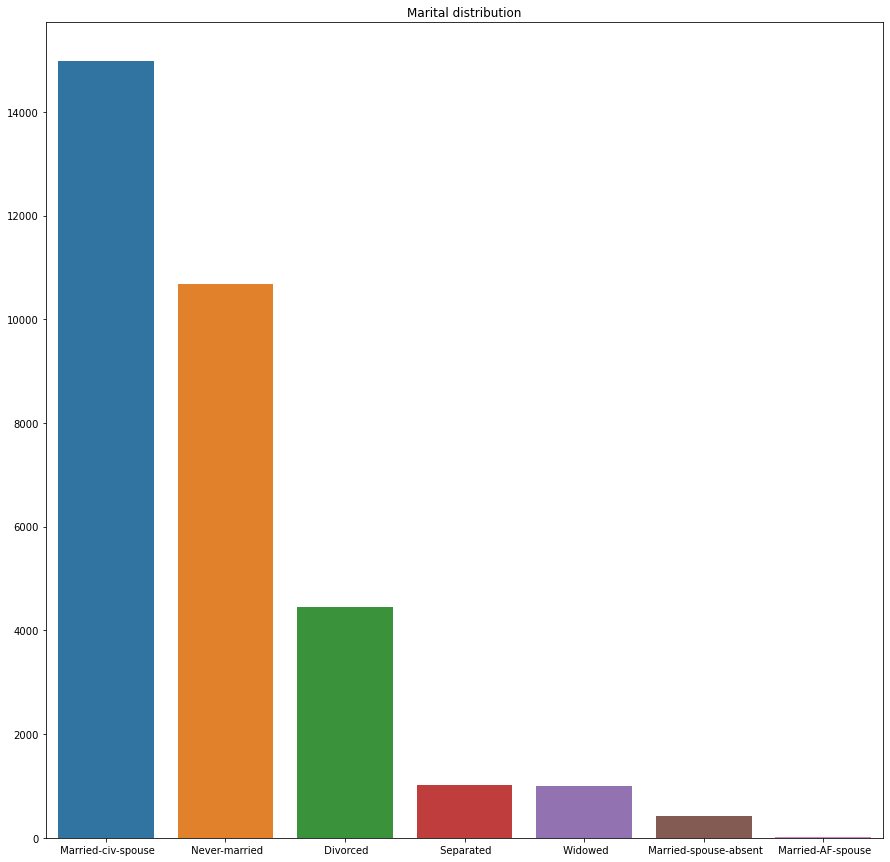

In [17]:
marital = df['Marital_status'].value_counts()


plt.figure(figsize=(15, 15))
sns.barplot(marital.index, marital.values)
plt.title('Marital distribution')

plt.tick_params(labelsize=10)
plt.show()

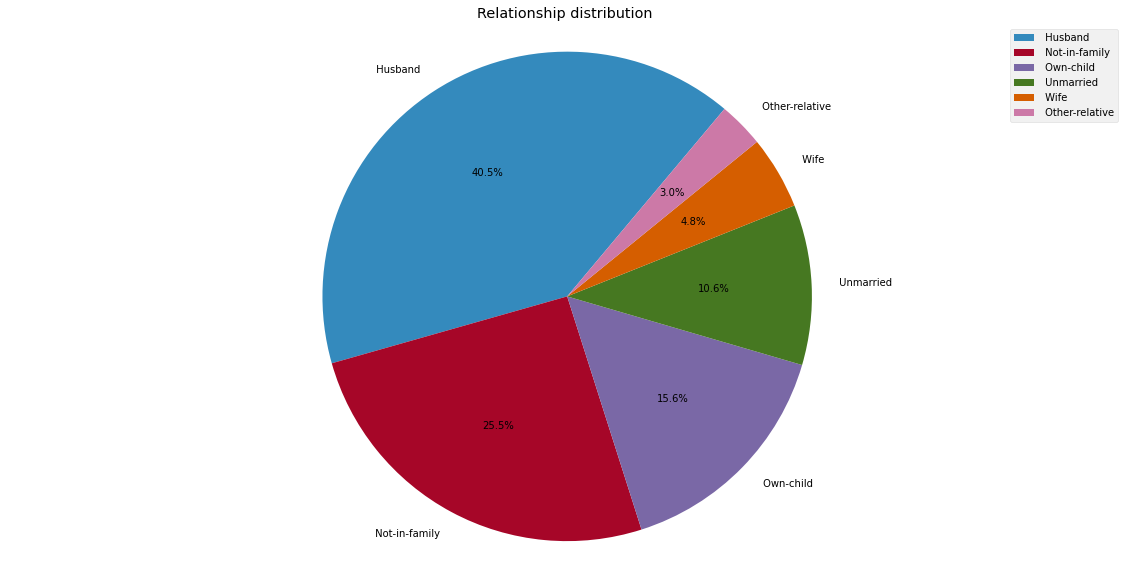

In [18]:
# Creating a pie chart for 'Age'
relation = df['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')


plt.title('Relationship distribution')
plt.axis('equal')
plt.legend(prop={'size': 10})
plt.show()

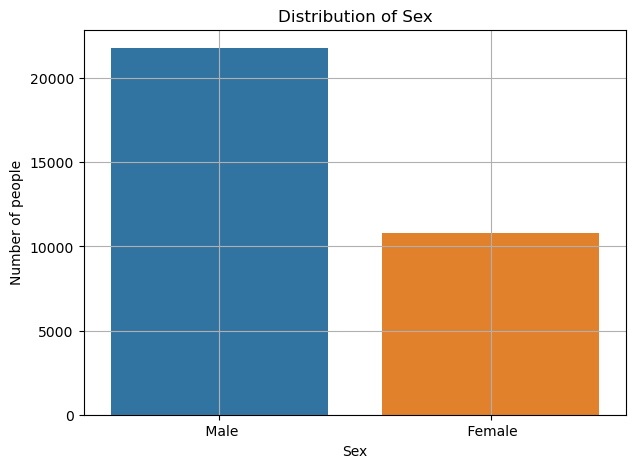

In [19]:
# Creating a barplot for 'Sex'
sex = df['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

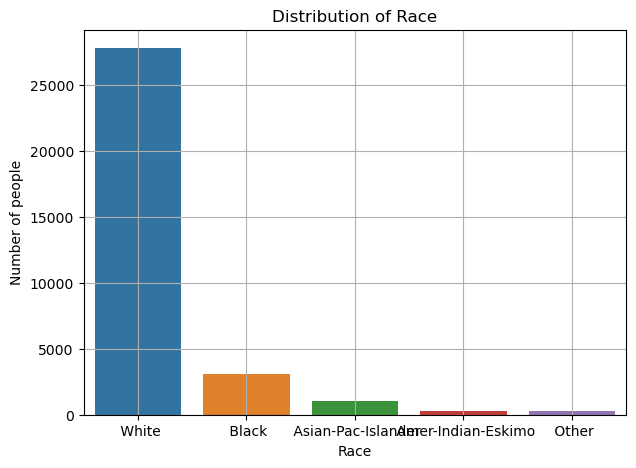

In [20]:
Race = df['Race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(Race.index, Race.values)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

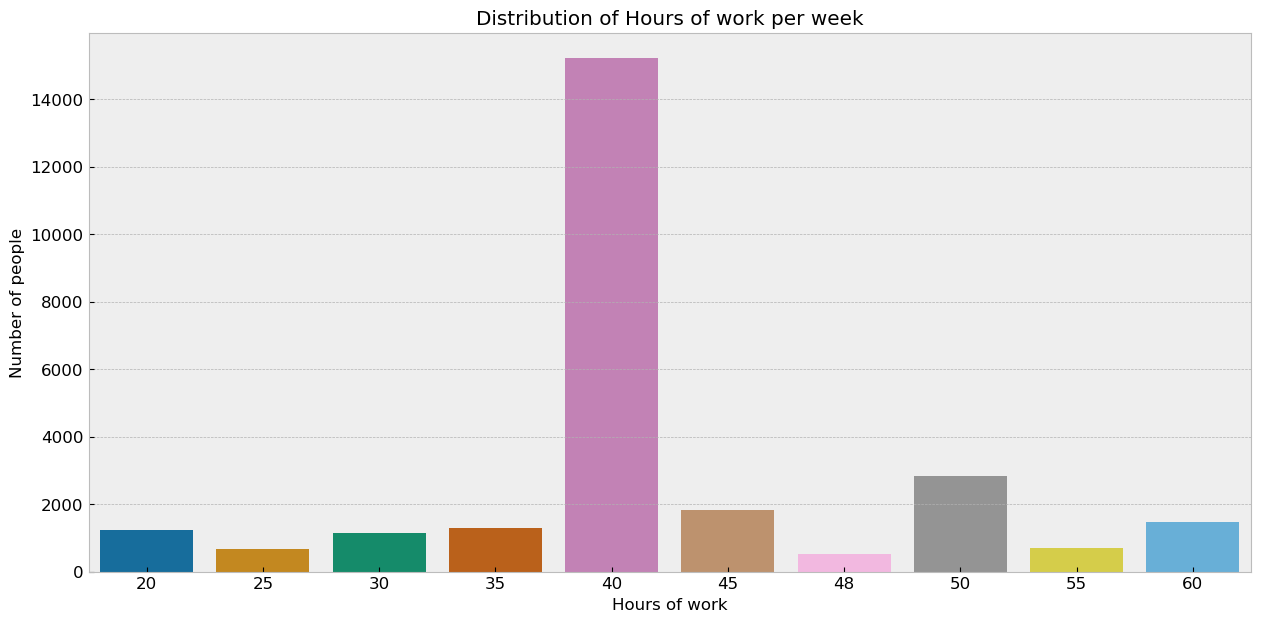

In [21]:
# Creating a barplot for 'Hours per week'
hours = df['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week')
plt.xlabel('Hours of work')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

# Bivariate Analysis

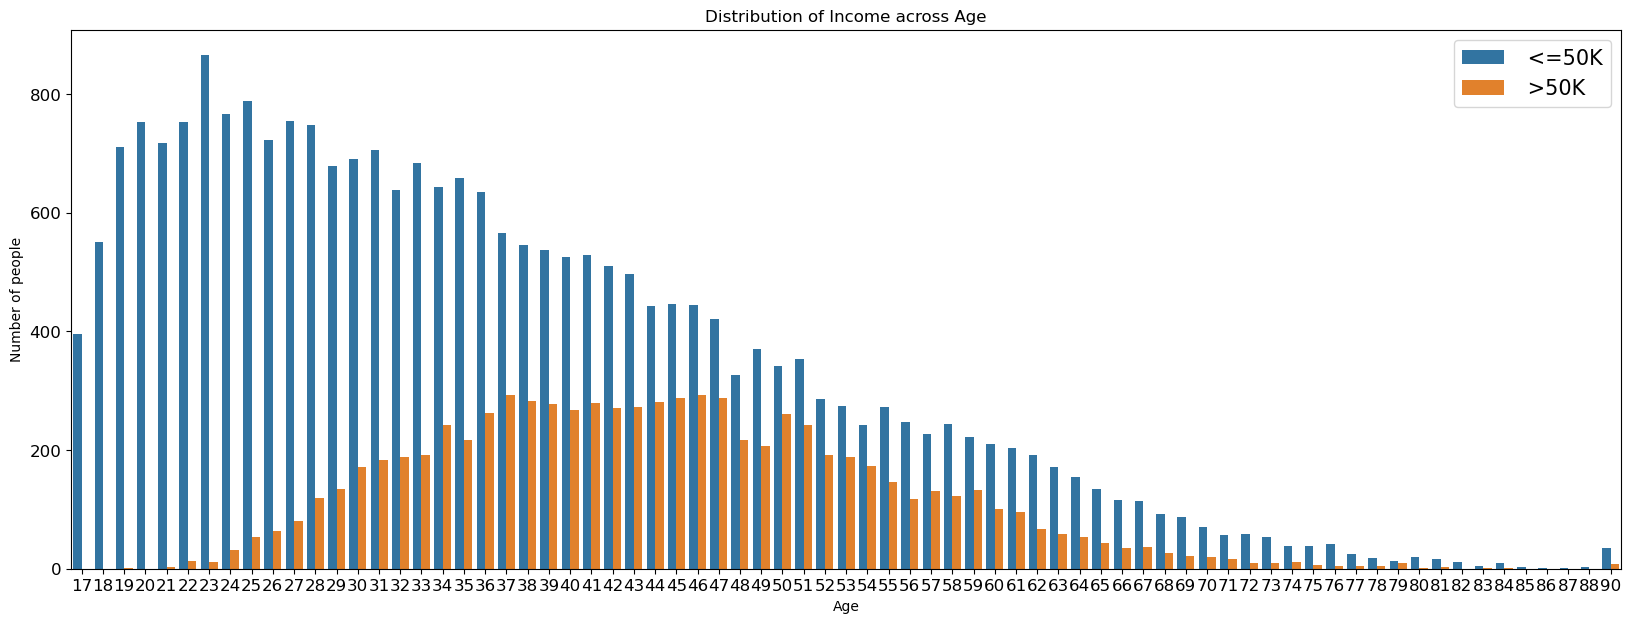

In [22]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df['Age'], hue=df['Income'])
plt.title('Distribution of Income across Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

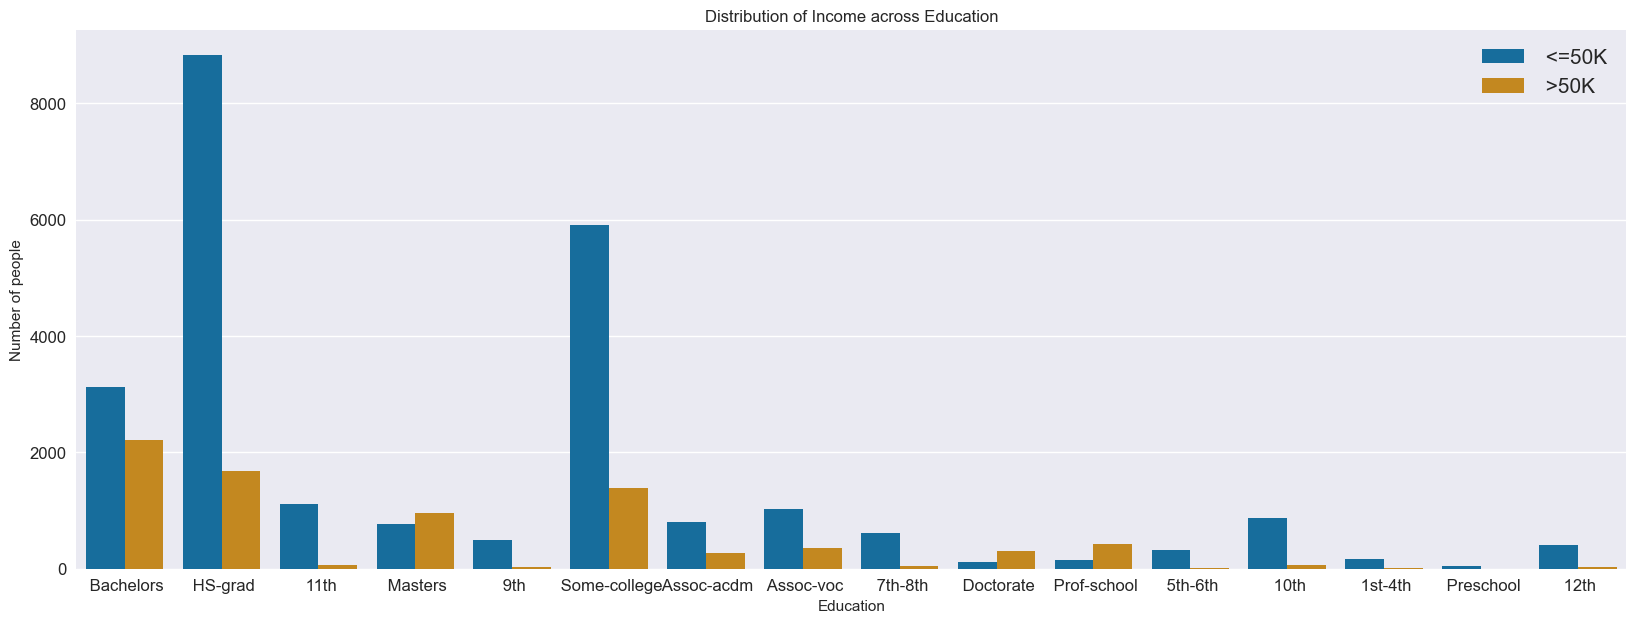

In [23]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education'],
              hue=df['Income'], palette='colorblind')
plt.title('Distribution of Income across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

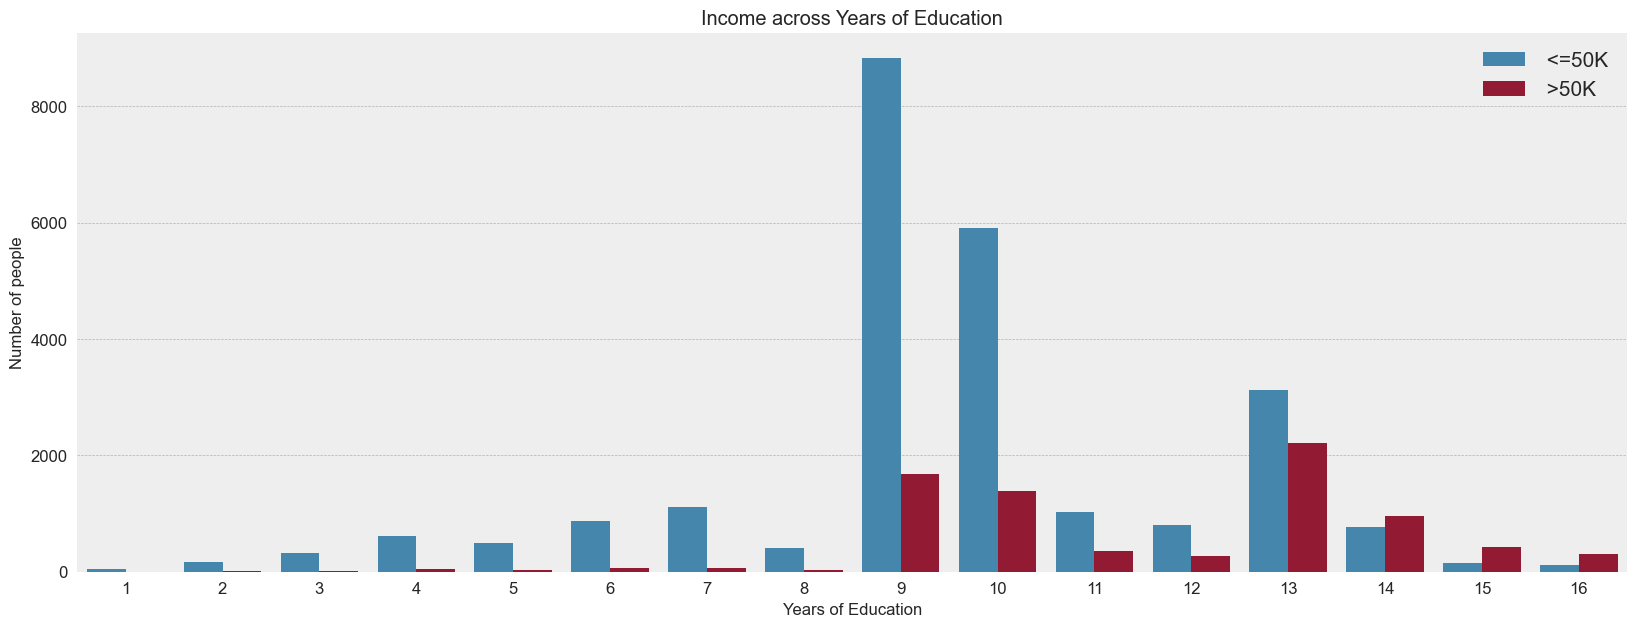

In [24]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education_num'],
              hue=df['Income'])
plt.title('Income across Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

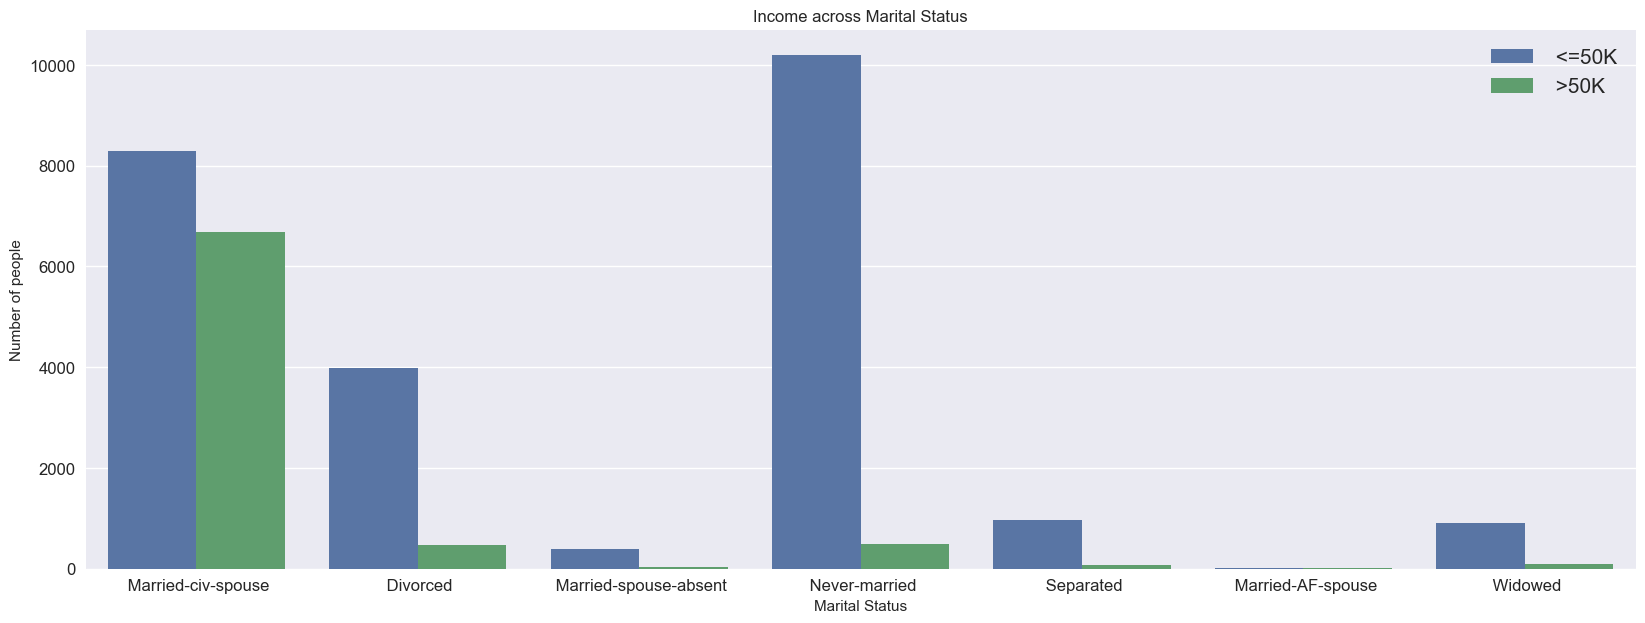

In [25]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Marital_status'], hue=df['Income'])
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

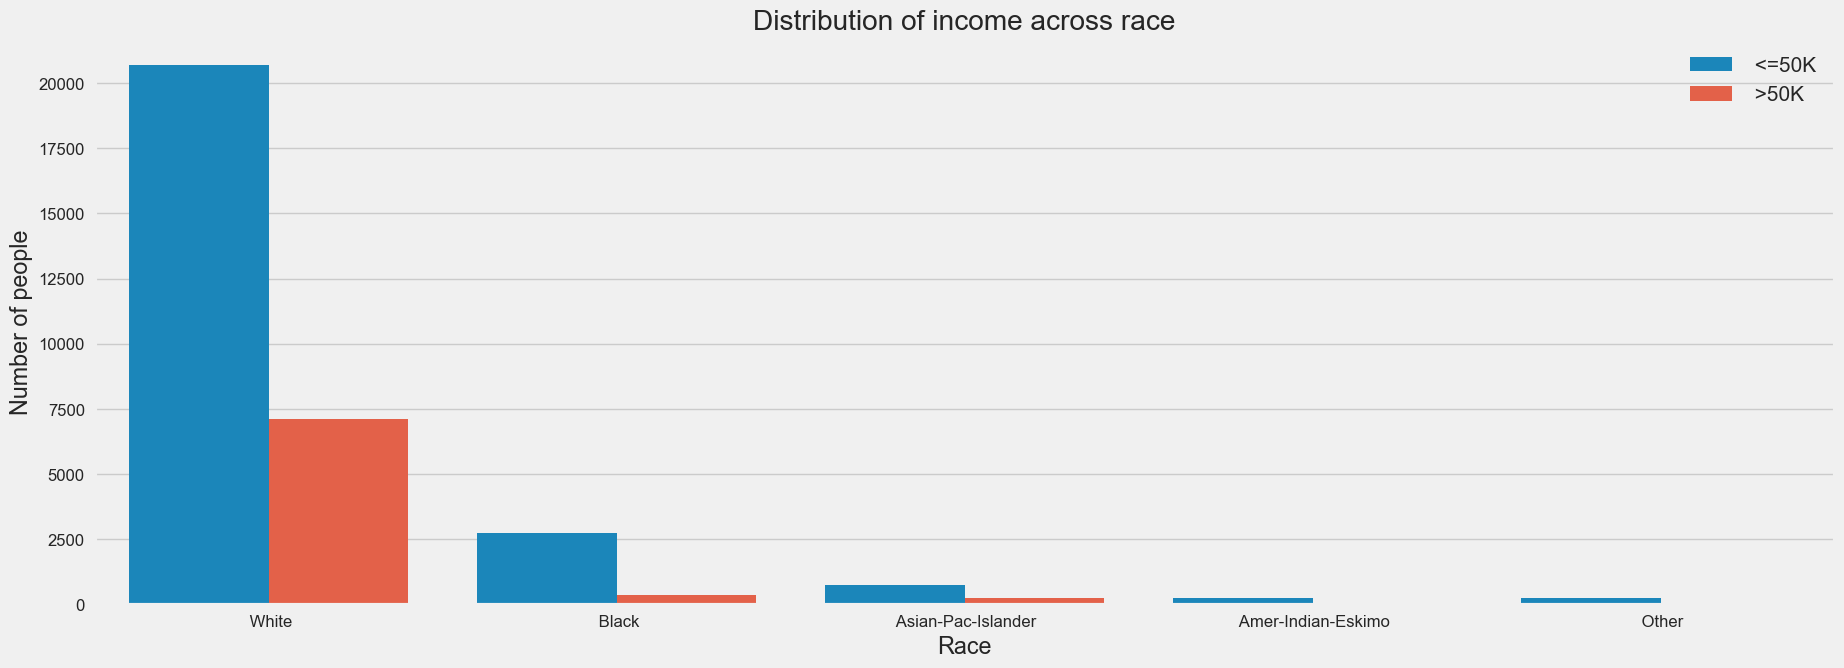

In [26]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(df['Race'], hue=df['Income'])
plt.title('Distribution of income across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

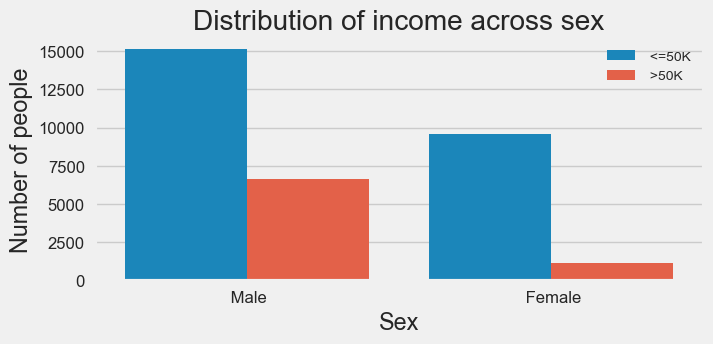

In [27]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(df['Sex'], hue=df['Income'])
plt.title('Distribution of income across sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

Observation : From above all graph it can be seen that, in this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

# Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [31]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


# Check distribution for skewness

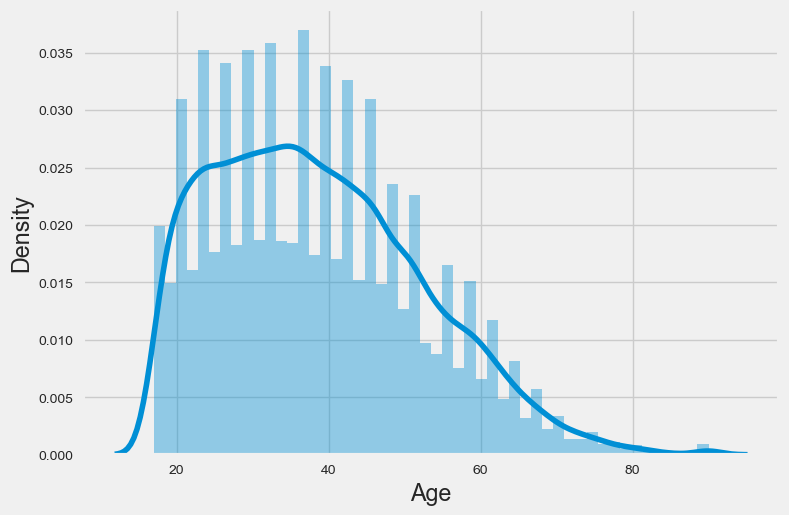

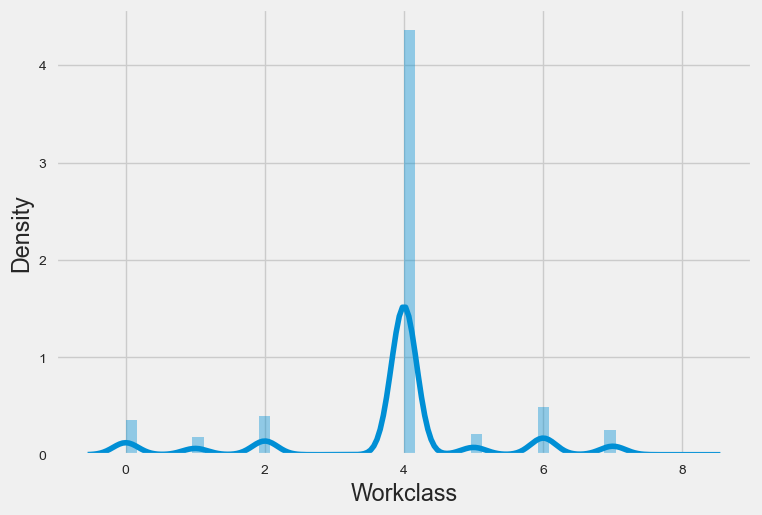

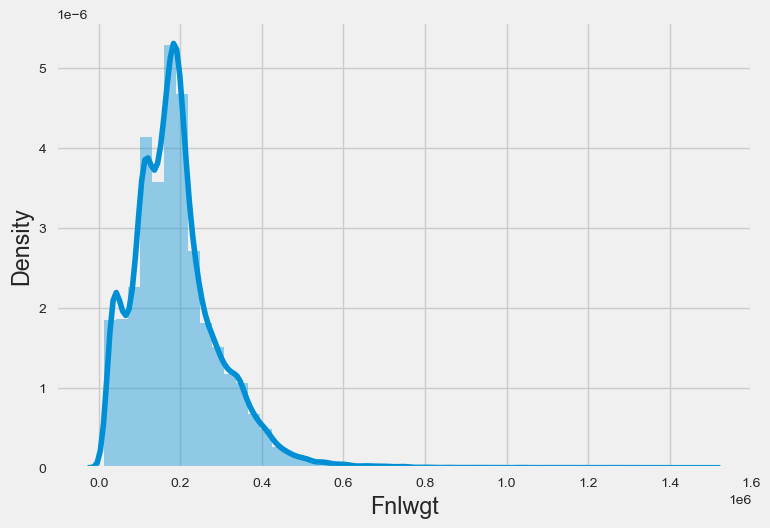

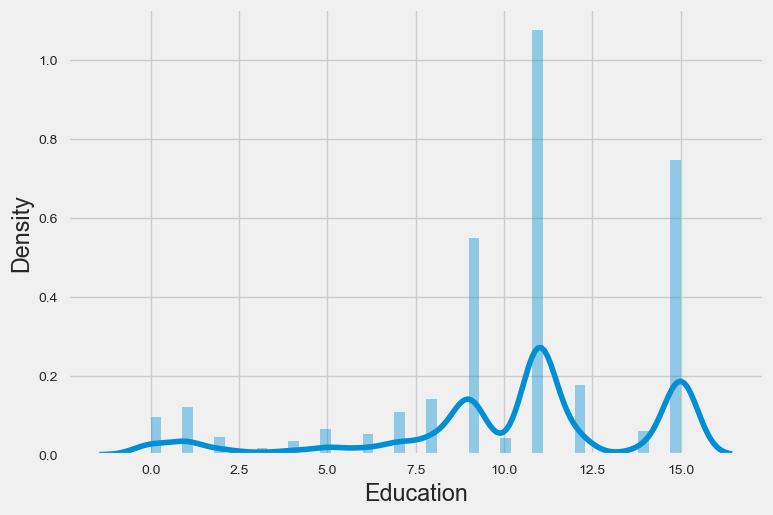

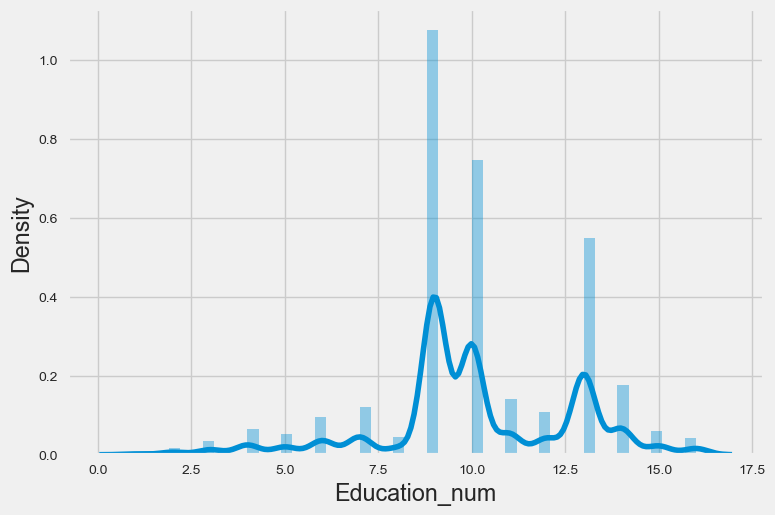

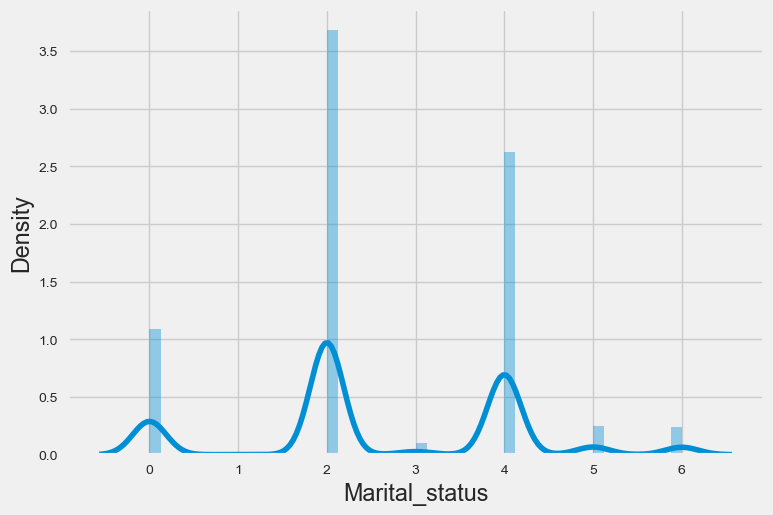

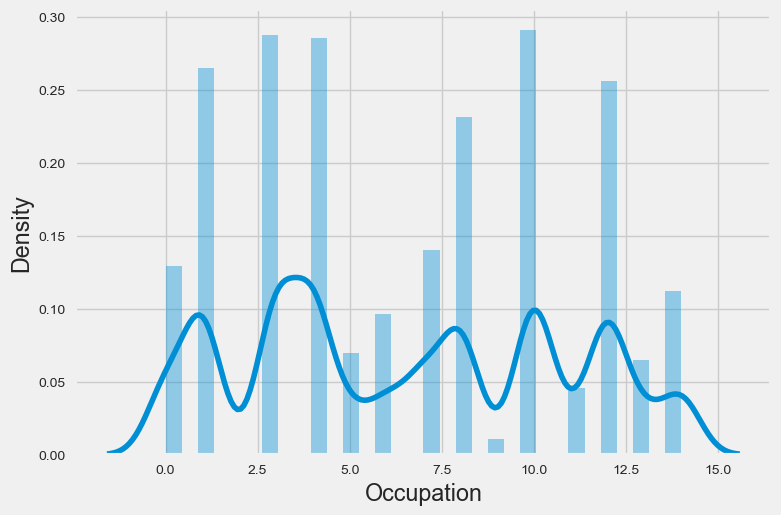

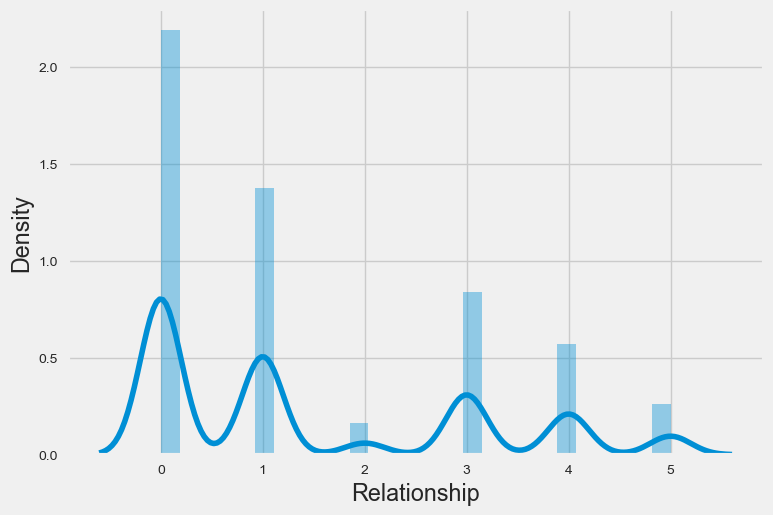

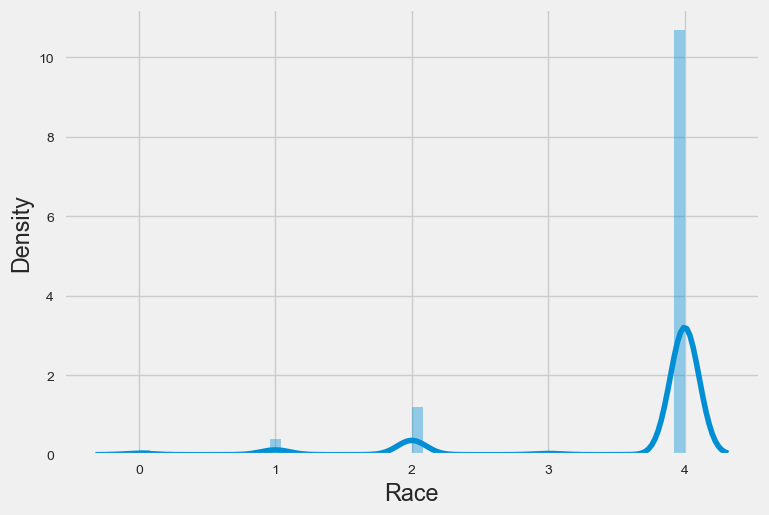

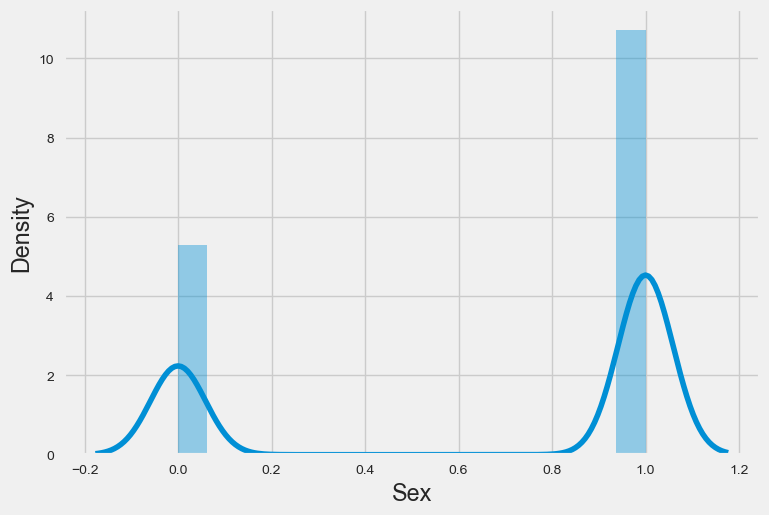

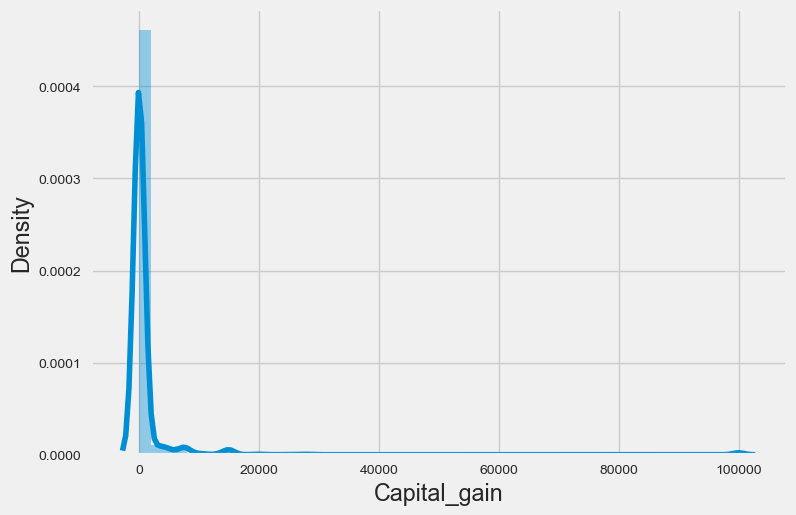

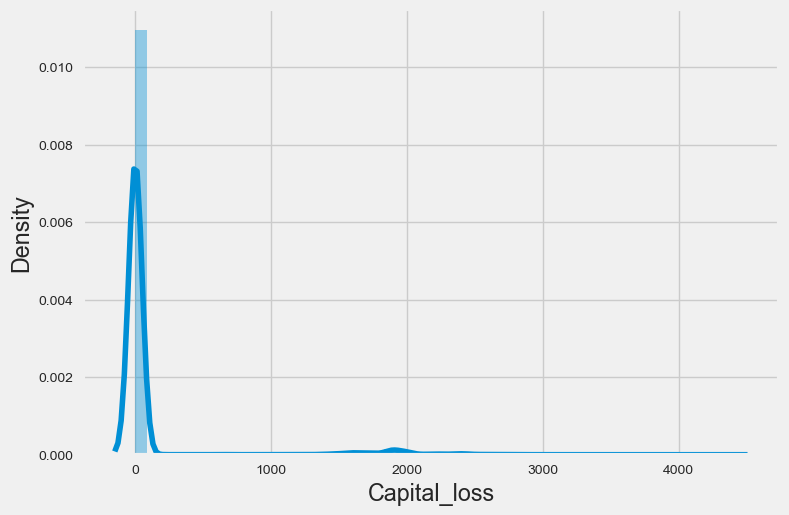

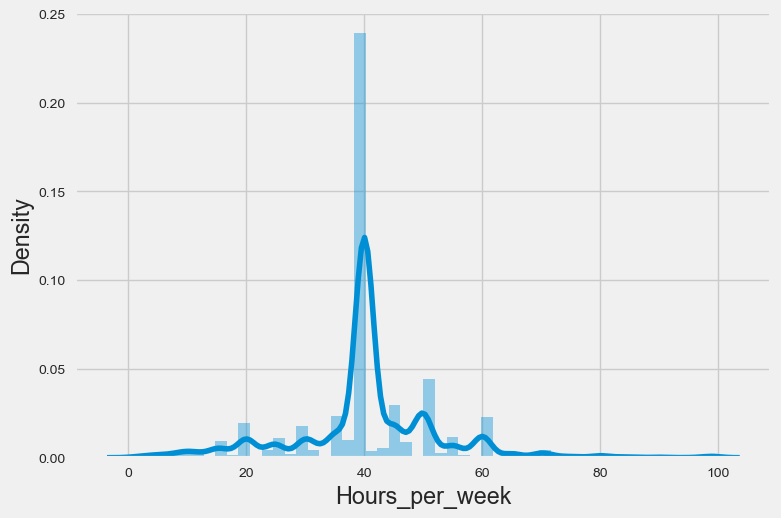

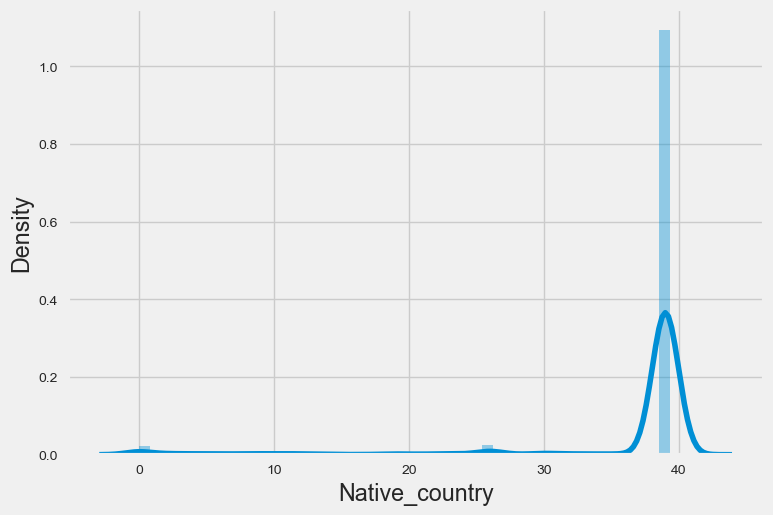

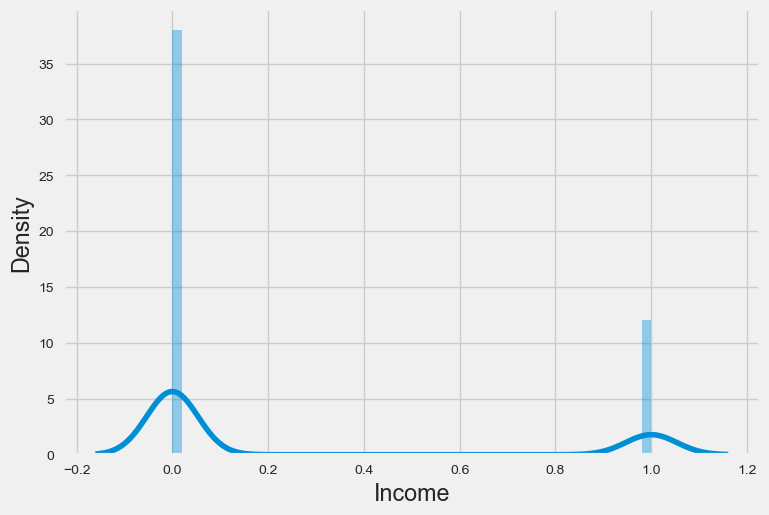

In [32]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

# Check correlation

In [33]:
dfcor=df.corr() 

In [34]:
dfcor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

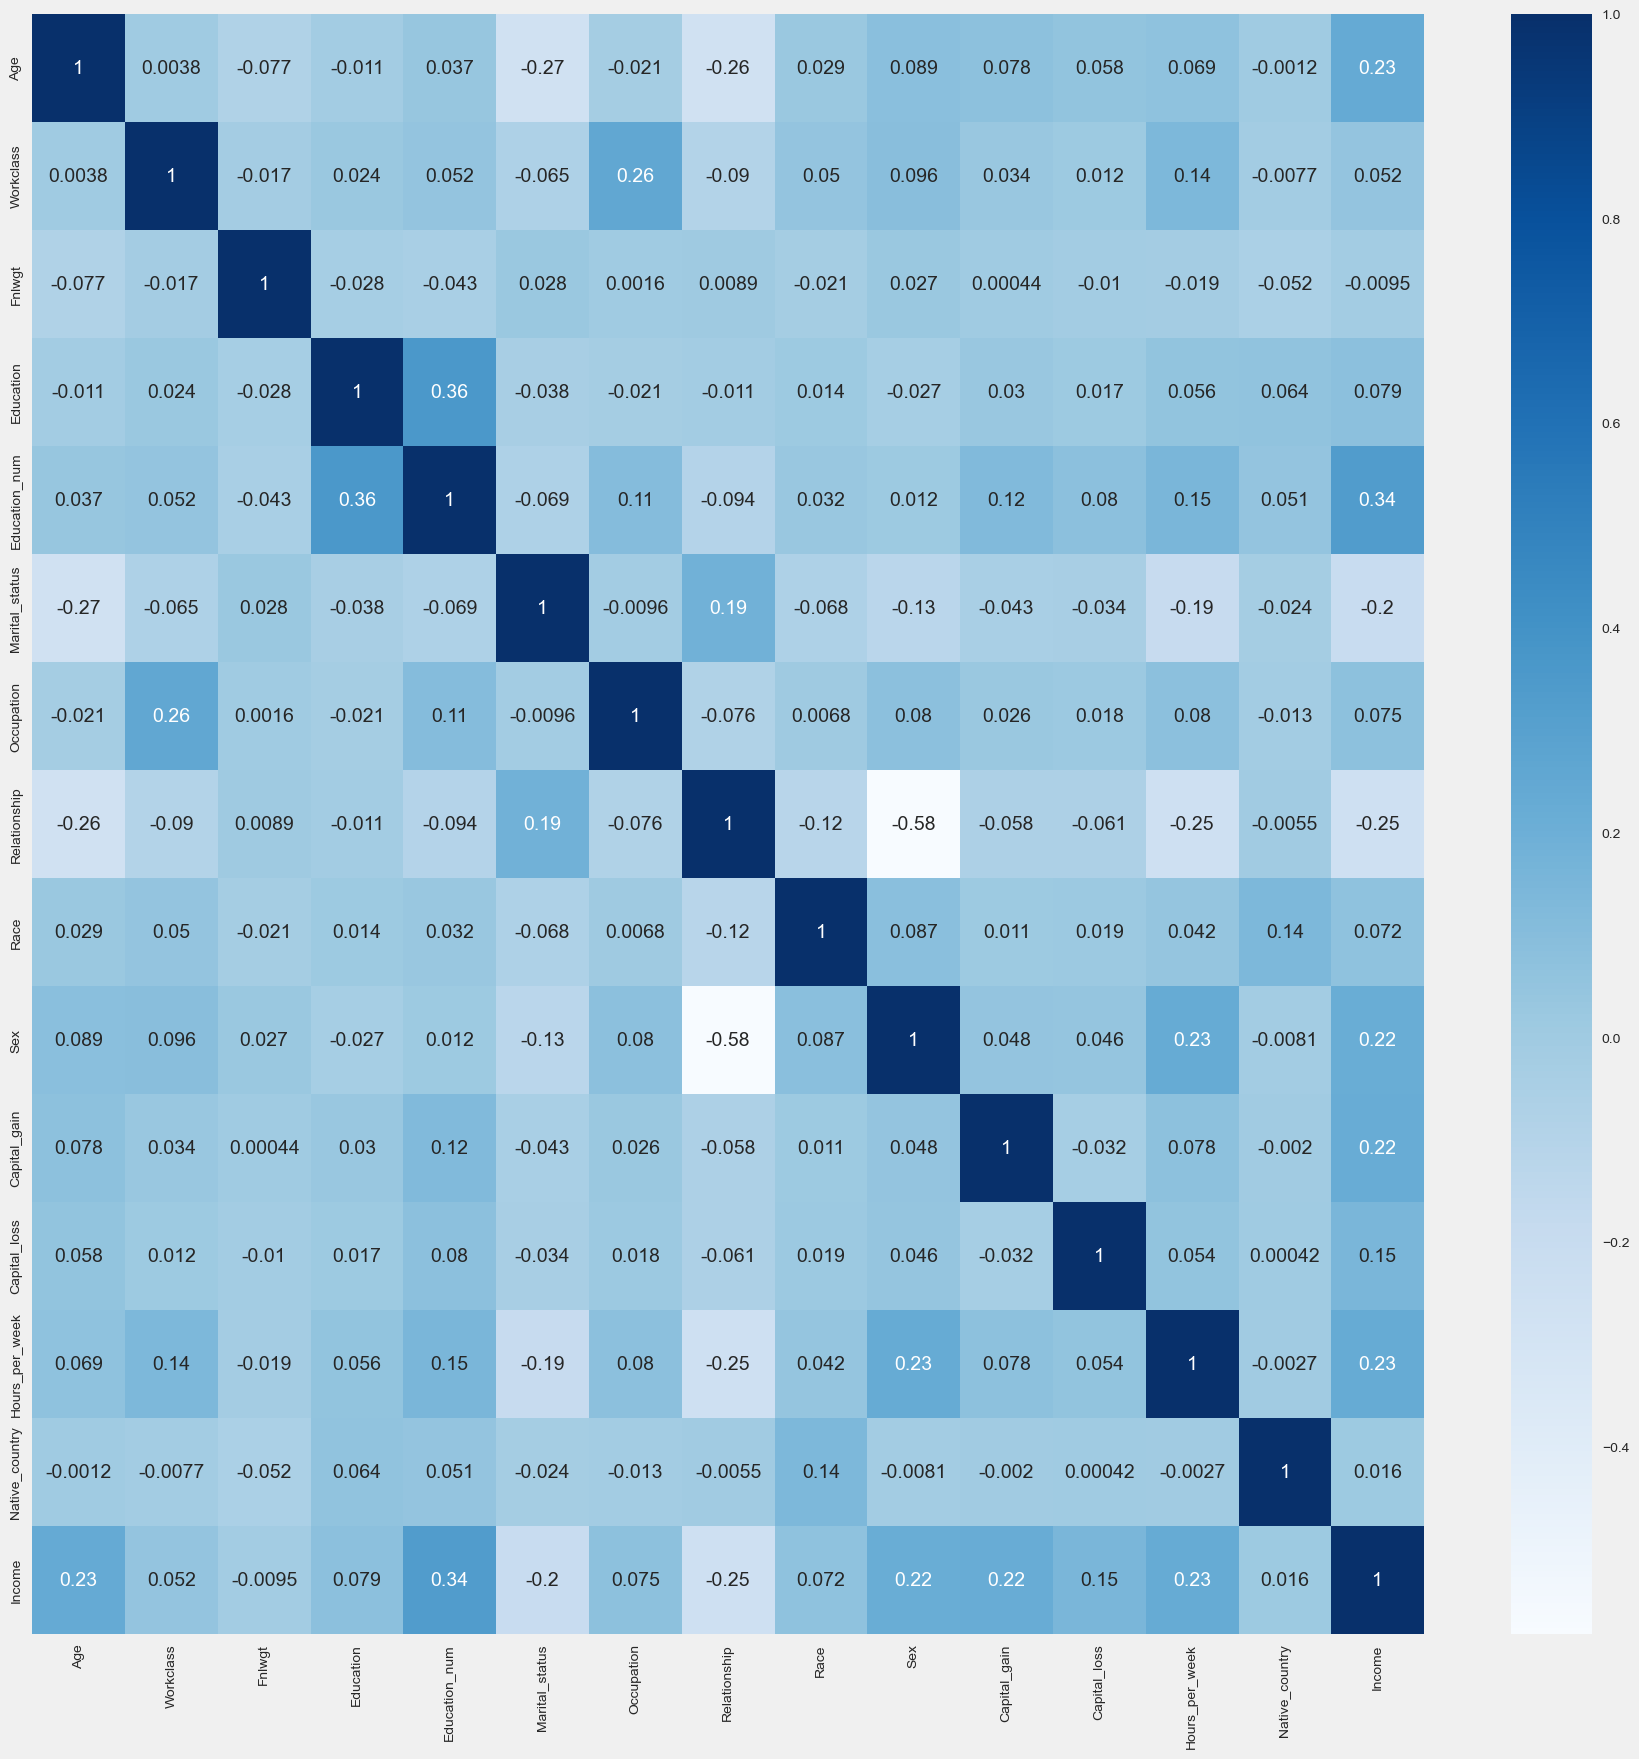

In [35]:
plt.figure(figsize=(20,20))           ### figsize=(10,10)   length,breadth
sns.heatmap(dfcor,cmap='Blues',annot=True)   ## cmap='Blues'  it will represent in blue color & annot=True means it will represent the correlated value in plot.

Observation : From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week

# Feature engineering

In [36]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [37]:
X = X.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

# Standard scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

# Balance the data

In [40]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [41]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [42]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [43]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [44]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Income, dtype: object

# Importing ML model

In [45]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Best Random State & Train_Test_Split

In [46]:
maxAccu=0  ## maximum accuracy
maxRS=0   ## best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)   ## fitting the data will train your model
    predrf=LR.predict(X_test)   ## this is the predicted target variable
    acc=accuracy_score(Y_test,predrf)  ## accuracy score
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        ## print('accuracy',maxAccu, 'random_state' i)

accuracy 0.8238636363636364 random_state 1
accuracy 0.8209459459459459 random_state 2
accuracy 0.8180282555282555 random_state 3
accuracy 0.8151105651105651 random_state 4
accuracy 0.82754914004914 random_state 5
accuracy 0.817414004914005 random_state 6
accuracy 0.8118857493857494 random_state 7
accuracy 0.8264742014742015 random_state 8
accuracy 0.8209459459459459 random_state 9
accuracy 0.820485257985258 random_state 10
accuracy 0.8223280098280098 random_state 11
accuracy 0.8118857493857494 random_state 12
accuracy 0.8184889434889435 random_state 13
accuracy 0.8221744471744472 random_state 14
accuracy 0.8198710073710074 random_state 15
accuracy 0.8220208845208845 random_state 16
accuracy 0.8131142506142506 random_state 17
accuracy 0.8229422604422605 random_state 18
accuracy 0.8218673218673219 random_state 19
accuracy 0.8126535626535627 random_state 20
accuracy 0.8209459459459459 random_state 21
accuracy 0.8260135135135135 random_state 22
accuracy 0.8192567567567568 random_state 23
a

In [47]:
print("Best accuracy is ", maxAccu," on Random_state",maxRS)

Best accuracy is  0.8326167076167076  on Random_state 109


In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=109)

In [49]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train) 
predlr=LR.predict(X_test)
print("--------------Result of LogisticRegression---------------------")
print("Accuracy",accuracy_score(Y_test,predlr)*100)
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
preddt=dt.predict(X_test)
print("--------------Result of DecisionTreeClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,preddt)*100)
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train) 
predrf=rf.predict(X_test)
print("--------------Result of RandomForestClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predrf)*100)
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))


from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train) 
predsvc=svc.predict(X_test)
print("--------------Result of SVC---------------------")
print("Accuracy",accuracy_score(Y_test,predsvc)*100)
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train) 
predKN=svc.predict(X_test)
print("--------------Result of KNeighborsClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predKN)*100)
print(confusion_matrix(Y_test,predKN))
print(classification_report(Y_test,predKN))

from sklearn.naive_bayes import GaussianNB
GNB=KNeighborsClassifier()
GNB.fit(X_train,Y_train) 
predGNB=svc.predict(X_test)
print("--------------Result of GaussianNB---------------------")
print("Accuracy",accuracy_score(Y_test,predGNB)*100)
print(confusion_matrix(Y_test,predGNB))
print(classification_report(Y_test,predGNB))


--------------Result of LogisticRegression---------------------
Accuracy 83.26167076167076
[[4786  281]
 [ 809  636]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5067
           1       0.69      0.44      0.54      1445

    accuracy                           0.83      6512
   macro avg       0.77      0.69      0.72      6512
weighted avg       0.82      0.83      0.82      6512

--------------Result of DecisionTreeClassifier---------------------
Accuracy 80.91216216216216
[[4394  673]
 [ 570  875]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5067
           1       0.57      0.61      0.58      1445

    accuracy                           0.81      6512
   macro avg       0.73      0.74      0.73      6512
weighted avg       0.81      0.81      0.81      6512

--------------Result of RandomForestClassifier---------------------
Accuracy 85.25798525798525
[[4661  406

# Cross validation 

In [50]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR,X,Y,cv=5)
scr2=cross_val_score(dt,X,Y,cv=5)
scr3=cross_val_score(rf,X,Y,cv=5)
scr4=cross_val_score(svc,X,Y,cv=5)
scr5=cross_val_score(KN,X,Y,cv=5)
scr6=cross_val_score(GNB,X,Y,cv=5)


print("Cross Validation score of Logistic Regresssion model : ",scr1.mean())
print("Cross Validation score of Decision Tree Classifier : ",scr2.mean())
print("Cross Validation score of Random Forest Classifier : ",scr3.mean())
print("Cross Validation score of SVC : ",scr4.mean())
print("Cross Validation score of KNeighbors classifier : ",scr5.mean())
print("Cross Validation score of GaussianNB : ",scr6.mean())

Cross Validation score of Logistic Regresssion model :  0.8196560196560198
Cross Validation score of Decision Tree Classifier :  0.7984029484029485
Cross Validation score of Random Forest Classifier :  0.845300982800983
Cross Validation score of SVC :  0.8466216216216216
Cross Validation score of KNeighbors classifier :  0.8309582309582311
Cross Validation score of GaussianNB :  0.8309582309582311


# Hyperparameter Tunning with GridSearchCV

In [51]:
RandomForestClassifier()

RandomForestClassifier()

In [52]:
from sklearn.model_selection import GridSearchCV

## creating parameter list to pass in GridSearchCv

parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth':[10,20,30,40,50],
            'criterion':['gini','entropy']}

In [55]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,Y_train)  ## fitiing the data in model
GCV.best_params_   ## Printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}

In [56]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [57]:
GCV.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2')

In [58]:
GCV_pred=GCV.best_estimator_.predict(X_test)   ## predicting with best parameters
accuracy_score(Y_test,GCV_pred) ## Checking final accuracy

0.8653255528255528

# AUC_ROC CURVE

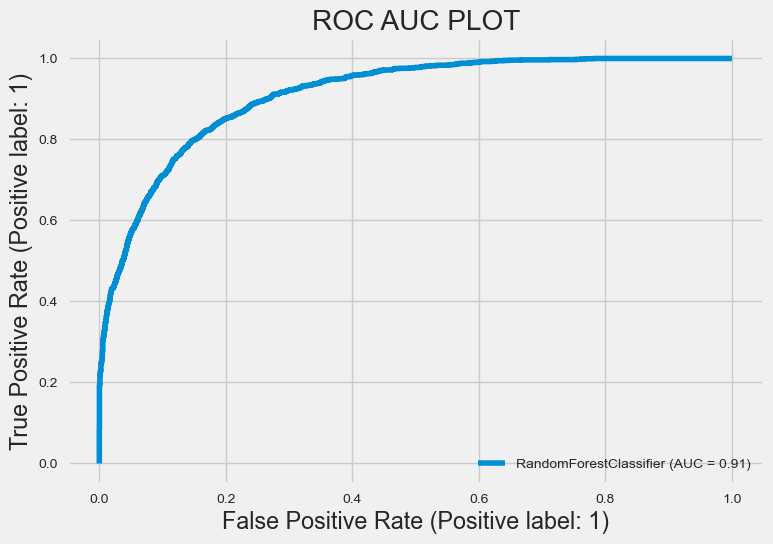

In [59]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title("ROC AUC PLOT")
plt.show()

# AdaBoostClassifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 85.995085995086
[[4762  305]
 [ 607  838]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5067
           1       0.73      0.58      0.65      1445

    accuracy                           0.86      6512
   macro avg       0.81      0.76      0.78      6512
weighted avg       0.85      0.86      0.85      6512



# Cross validation with AdaBoost

In [61]:
scr7=cross_val_score(ad,X,Y,cv=5)
print("Cross Validation score of AdaBoostClassifier : ",scr7.mean())

Cross Validation score of AdaBoostClassifier :  0.8530098280098282


In [62]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 86.37899262899262
[[4757  310]
 [ 577  868]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5067
           1       0.74      0.60      0.66      1445

    accuracy                           0.86      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.86      0.86      0.86      6512



# Conclusion 

From above analysis, some modeles gives same result such as Logistic Regresssion,Random Forest Classifier,SVC,KNeighbors classifier,GaussianNB,AdaBoostClassifier.

By hyperperameter tunning RandomForestClassifier gives the best value for this dataset.

# Saving the model in pickle format

In [65]:
## PICKeling of file or serialization of a file

import joblib
joblib.dump(GCV.best_estimator_,"census_income1.pkl")

['census_income1.pkl']